# Linear regression From Scratch

In [24]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

- **`datasets.make_regression`**: This function from `scikit-learn` generates a random regression problem.
- **`train_test_split`**: This function from `scikit-learn` splits the dataset into training and testing sets.

In [25]:
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)


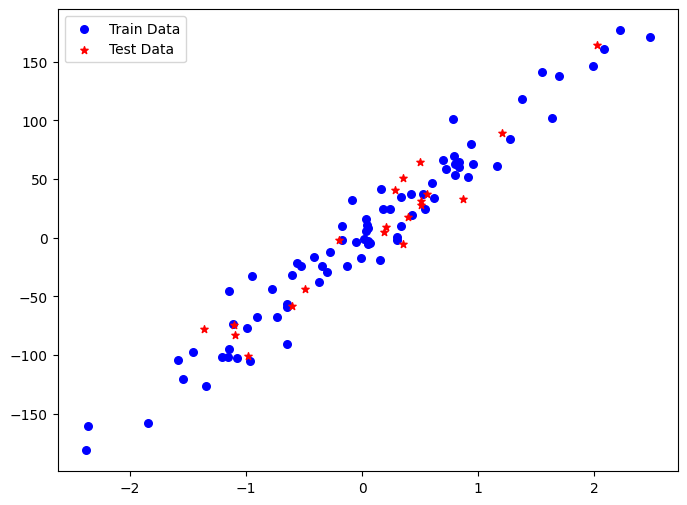

In [26]:
fig = plt.figure(figsize=(8,6))
plt.scatter(X_train[:, 0], y_train, color = "b", marker = "o", s = 30, label='Train Data')
plt.scatter(X_test[:, 0], y_test, color = "r", marker = "*", s = 30, label= 'Test Data')
plt.legend()
plt.show()


In [27]:
import numpy as np


class LinearRegression:

    def __init__(self, lr = 0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            y_pred = np.dot(X, self.weights) + self.bias

            dw = (1/n_samples) * np.dot(X.T, (y_pred-y))
            db = (1/n_samples) * np.sum(y_pred-y)

            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db

    def predict(self, X):
        y_pred = np.dot(X, self.weights) + self.bias
        return y_pred

In [28]:
reg = LinearRegression(lr=0.01)
reg.fit(X_train,y_train)
predictions = reg.predict(X_test)


- This function calculates the Mean Squared Error (MSE) between the actual values (`y_test`) and the predicted values (`predictions`).

In [29]:
def mse(y_test, predictions):
    return np.mean((y_test-predictions)**2)

mse = mse(y_test, predictions)
print(mse)

305.7719958301902


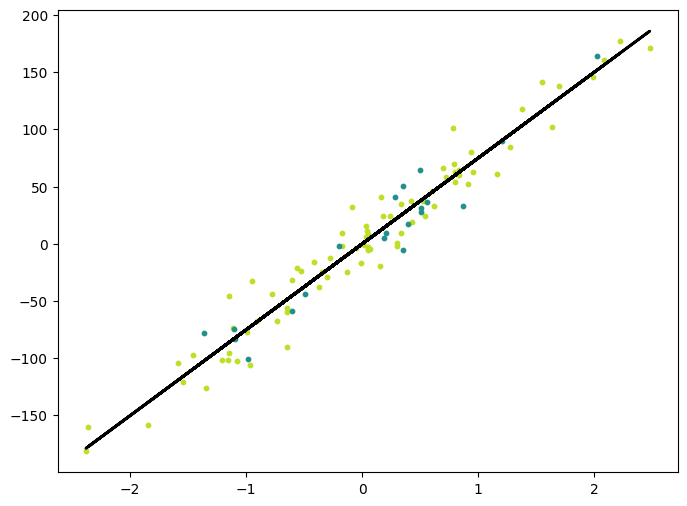

In [30]:
y_pred_line = reg.predict(X)
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8,6))
m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
plt.plot(X, y_pred_line, color='black', linewidth=2, label='Prediction')
plt.show()


### Gradient Descent

- **Prediction**: 
  $$ \hat{y} = X \cdot \text{weights} + \text{bias} $$
  where \( \hat{y} \) is the predicted value.

- **Gradients**:
  - Weight gradient:
    $$ dw = \frac{1}{n_{\text{samples}}} \cdot X^T \cdot (\hat{y} - y) $$
  - Bias gradient:
    $$ db = \frac{1}{n_{\text{samples}}} \cdot \sum (\hat{y} - y) $$

- **Update Rules**:
  - Update weights:
    $$ \text{weights} = \text{weights} - \text{lr} \cdot dw $$
  - Update bias:
    $$ \text{bias} = \text{bias} - \text{lr} \cdot db $$

### Predict Method
```python
def predict(self, X):
    y_pred = np.dot(X, self.weights) + self.bias
    return y_pred
```
- **Prediction**:
  $$ \hat{y} = X \cdot \text{weights} + \text{bias} $$

This method uses the learned weights and bias to predict the target values for new data.
